# The goal of this project is to view the efficacy of pitch types, and ultimately create a model than can predict if a given pitch would result in a strike.

## Review the data

Read the pitches file and review the data set.

In [57]:
# start by viewing the base information
import pandas as pd
import numpy as np

# enable viewing all the columns when peforming df.head()
pd.set_option('display.max_columns', None)

# get the general information and the first few rows
pitches = pd.read_csv('pitches.csv')
pitches.info()
pitches.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867154 entries, 0 to 2867153
Data columns (total 40 columns):
 #   Column           Dtype  
---  ------           -----  
 0   px               float64
 1   pz               float64
 2   start_speed      float64
 3   end_speed        float64
 4   spin_rate        float64
 5   spin_dir         float64
 6   break_angle      float64
 7   break_length     float64
 8   break_y          float64
 9   ax               float64
 10  ay               float64
 11  az               float64
 12  sz_bot           float64
 13  sz_top           float64
 14  type_confidence  float64
 15  vx0              float64
 16  vy0              float64
 17  vz0              float64
 18  x                float64
 19  x0               float64
 20  y                float64
 21  y0               float64
 22  z0               float64
 23  pfx_x            float64
 24  pfx_z            float64
 25  nasty            float64
 26  zone             float64
 27  code        

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,34.685,-11.960,1.72,3.56,2.0,-6.409,-136.065,-3.995,101.140000,2.280,158.780000,50.0,5.302,4.16,10.93,55.0,3.0,C,S,FF,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,34.225,-10.085,1.72,3.56,2.0,-8.411,-135.690,-5.980,124.280000,2.119,175.410000,50.0,5.307,6.57,12.00,31.0,5.0,S,S,FF,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,35.276,-11.560,1.72,3.56,2.0,-9.802,-137.668,-3.337,136.740000,2.127,150.110000,50.0,5.313,7.61,10.88,49.0,1.0,F,S,FF,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,28.354,-20.540,1.74,3.35,2.0,-8.071,-133.005,-6.567,109.685636,2.279,187.463482,50.0,5.210,1.17,6.45,41.0,13.0,B,B,FF,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,21.774,-34.111,1.72,3.56,2.0,-6.309,-110.409,0.325,146.527525,2.179,177.242829,50.0,5.557,-8.43,-1.65,18.0,13.0,B,B,CU,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


Look into the "at bat" data.

In [58]:
# at-bat information
atbat = pd.read_csv('atbats.csv')
atbat.info()
atbat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740389 entries, 0 to 740388
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ab_id       740389 non-null  int64 
 1   batter_id   740389 non-null  int64 
 2   event       740389 non-null  object
 3   g_id        740389 non-null  int64 
 4   inning      740389 non-null  int64 
 5   o           740389 non-null  int64 
 6   p_score     740389 non-null  int64 
 7   p_throws    740389 non-null  object
 8   pitcher_id  740389 non-null  int64 
 9   stand       740389 non-null  object
 10  top         740389 non-null  bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 57.2+ MB


,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True
3,2015000004,425509,Strikeout,201500001,1,2,0,L,452657,R,True
4,2015000005,571431,Strikeout,201500001,1,3,0,L,452657,L,True


Review the games data.

In [59]:
# games information
games = pd.read_csv('games.csv')
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   attendance        9718 non-null   int64 
 1   away_final_score  9718 non-null   int64 
 2   away_team         9718 non-null   object
 3   date              9718 non-null   object
 4   elapsed_time      9718 non-null   int64 
 5   g_id              9718 non-null   int64 
 6   home_final_score  9718 non-null   int64 
 7   home_team         9718 non-null   object
 8   start_time        9718 non-null   object
 9   umpire_1B         9718 non-null   object
 10  umpire_2B         9715 non-null   object
 11  umpire_3B         9718 non-null   object
 12  umpire_HP         9718 non-null   object
 13  venue_name        9718 non-null   object
 14  weather           9718 non-null   object
 15  wind              9718 non-null   object
 16  delay             9718 non-null   int64 
dtypes: int64(6), o

,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,35055,3,sln,2015-04-05,184,201500001,0,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,45909,1,ana,2015-04-06,153,201500002,4,sea,1:12 PM,Ron Kulpa,Brian Knight,Vic Carapazza,Larry Vanover,Safeco Field,"54 degrees, cloudy","1 mph, Varies",0
2,36969,2,atl,2015-04-06,156,201500003,1,mia,4:22 PM,Laz Diaz,Chris Guccione,Cory Blaser,Jeff Nelson,Marlins Park,"80 degrees, partly cloudy","16 mph, In from CF",16
3,31042,6,bal,2015-04-06,181,201500004,2,tba,3:12 PM,Ed Hickox,Paul Nauert,Mike Estabrook,Dana DeMuth,Tropicana Field,"72 degrees, dome","0 mph, None",0
4,45549,8,bos,2015-04-06,181,201500005,0,phi,3:08 PM,Phil Cuzzi,Tony Randazzo,Will Little,Gerry Davis,Citizens Bank Park,"71 degrees, partly cloudy","11 mph, Out to RF",0


## Analyze the pitch type data

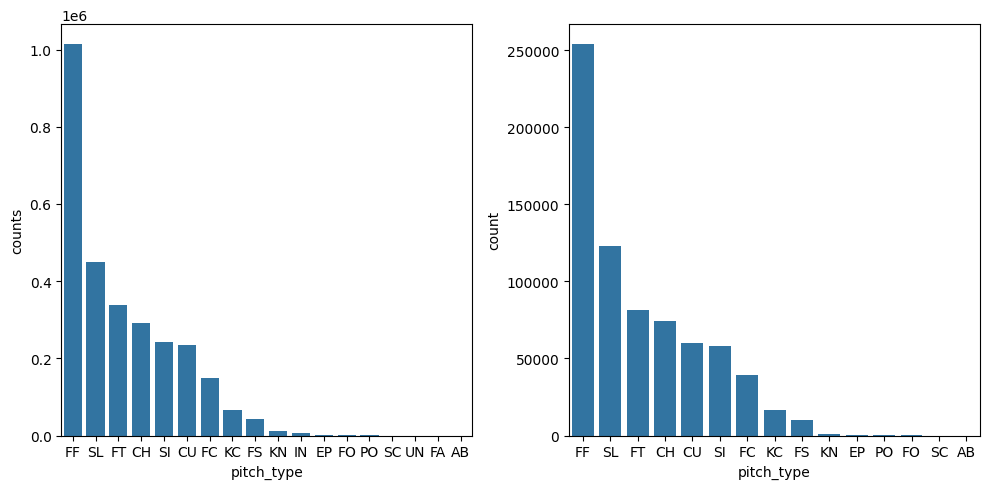

In [60]:
# import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# what are the most commonly thrown pitches?
pitch_agg = pitches['pitch_type'].value_counts().reset_index(name='counts')

# compare that to just 2018
# link pitches to atbats on ab_id from atbats to games on g_id
merged_info_2018 = pitches.merge(atbat, on='ab_id', how='inner').merge(games[games['date'].str[:4]=='2018'], on='g_id', how='inner')
plot_merged_info = merged_info_2018['pitch_type'].value_counts()

# plot the two side-by-side to gauge the distribution
fig, axs = plt.subplots(ncols=2,figsize=(10,5))
sns.barplot(data=pitch_agg, x=pitch_agg['pitch_type'], y=pitch_agg['counts'],ax=axs[0])
sns.barplot(data=plot_merged_info,ax=axs[1])

plt.tight_layout()
plt.show()

Fastballs are clearly the most common pitch.

What is the outcome spread from fastballs?

<Axes: xlabel='code', ylabel='counts'>

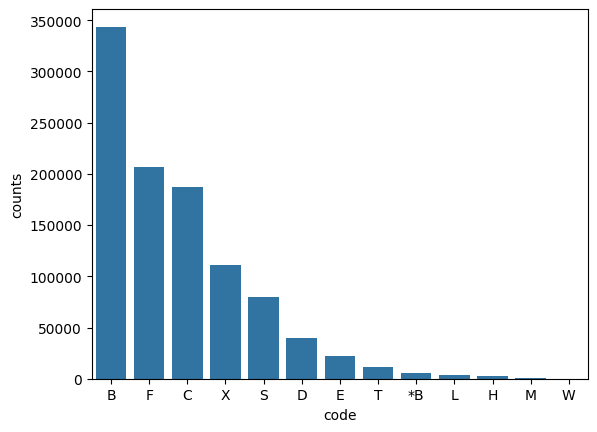

In [61]:
# filter for only fastballs
ff_pitches = pitches[pitches['pitch_type']=='FF']
# get the code counts
grouped_pitches = ff_pitches.groupby('pitch_type')['code'].value_counts().reset_index(name='counts')

# plot the data
sns.barplot(data=grouped_pitches, x='code', y='counts')

The most common outcome are Balls by a large margin.  
The next two most common are Foul Hits and Called Strikes.

## Deeper analysis on pitches

Raw percentages of pitches that lead to strikes.  

To perform this analysis, I will be creating a 0/1 column to represent if the pitch resulted in a strike (C - Called Strike, S - Swinging Strike)  
Note: I will be removing any records where the outcome is unknown.

In [62]:
# remove any records where the pitch outcome is unknown
merged_info_2018 = merged_info_2018[merged_info_2018['code'].isna() == False]

# Create a new 0/1 column for whether or not it was a strike
merged_info_2018['strike'] = merged_info_2018['code'].isin(['S','C']).astype(int).drop(columns=['code'])

# Find the percentage of strikes by pitch
merged_info_2018.groupby('pitch_type')['strike'].mean().sort_values(ascending=False)

pitch_type
KC    0.297360
SL    0.293739
CU    0.288784
KN    0.282337
FF    0.268362
SI    0.262946
FC    0.261412
EP    0.250000
FT    0.243479
CH    0.241187
FO    0.238095
FS    0.232320
SC    0.162162
AB    0.000000
PO    0.000000
Name: strike, dtype: float64

Overall in 2018 the top three successful strike producing pitches were:  
* KC - Knuckle Curve
* SL - Slider
* CU - Curveball
  
Fastball comes in 5th place with about a 27% success rate.  
  
The next analysis takes the count of pitches for the least common pitch and performs the same analysis but evenly distributed from the data through random sampling.  
Note: There is only 1 occurence of pitch AB, so that record is removed from the dataset for this analysis.  
I will also remove any records where the pitch type is unknown.

In [63]:
# remove the AB and unknown pitch records
merged_info_2018 = merged_info_2018[(merged_info_2018['pitch_type']!='AB') & (merged_info_2018['pitch_type'].isna() == False)]

# Get the minimum count of pitch_type
min_count = merged_info_2018['pitch_type'].value_counts().min()

# Initialize an empty DataFrame to store the resampled data
pitch_sampled = pd.DataFrame()

# Resample data for each pitch_type
for pitch in merged_info_2018['pitch_type'].unique():
    pitch_temp = merged_info_2018[merged_info_2018['pitch_type'] == pitch].sample(min_count, replace=False, random_state=42)
    pitch_sampled = pd.concat([pitch_sampled, pitch_temp])

# Now, calculate the strike probability for each pitch_type in the resampled data
pitch_strike_prob = pitch_sampled.groupby('pitch_type')['strike'].mean()

# view the output
pitch_strike_prob.sort_values(ascending=False)


pitch_type
SL    0.459459
KC    0.405405
FC    0.378378
CH    0.324324
CU    0.324324
FF    0.297297
FT    0.297297
SI    0.243243
FO    0.216216
KN    0.216216
EP    0.189189
FS    0.162162
SC    0.162162
PO    0.000000
Name: strike, dtype: float64

After taking a random sample of 37 records (the least amount of pitches for any given pitch) for each pitch, we can see the mean changed a bit.  
With this random sample, it seems that the Slider is most successful at about 46% of the 37 pitches resulting in a strike.  
Fastball slides down one spot, but because of the reduced record set is showing a success rate of about 30%.

Next will be analysis of a given pitcher's success with pitches resulting in strikes.  
First task is to add pitcher and batter names to the data set.

In [64]:
# get the pitcher and batter names
players = pd.read_csv('player_names.csv',index_col='id')

# get the pitcher name as "lastname, firstname" as pitcher_name
merged_info_2018 = merged_info_2018.merge(players,left_on='pitcher_id',right_index=True,how='inner')
merged_info_2018['pitcher_name'] = merged_info_2018['last_name'] + ', ' + merged_info_2018['first_name']
merged_info_2018.drop(columns=['first_name','last_name'],inplace=True)

# get the batter name as "lastname, firstname" called batter_name
merged_info_2018 = merged_info_2018.merge(players,left_on='batter_id',right_index=True,how='inner')
merged_info_2018['batter_name'] = merged_info_2018['last_name'] + ', ' + merged_info_2018['first_name']
merged_info_2018.drop(columns=['first_name','last_name'],inplace=True)


Find the top 10 pitchers that throw strikes.

In [65]:
# view the top 10 pitchers by success rate descending
# also get the count so we can compare
top_pitchers = (merged_info_2018.groupby('pitcher_name')
                .agg({'strike': ['mean','count']})
                .sort_values(('strike','mean'),ascending=False)
                .head(10))

top_pitchers

strike      
                      mean count
pitcher_name                    
Dixon, Brandon    0.428571    14
Urias, Julio      0.379310    58
Wieck, Brad       0.376344    93
Rua, Ryan         0.375000     8
Sandoval, Pablo   0.363636    11
Betances, Dellin  0.359788  1134
Ottavino, Adam    0.357986  1271
Eickhoff, Jerad   0.357143    98
Perez, Oliver     0.351178   467
Sale, Chris       0.345087  2524

There is a large variation in the amount of pitches each pitcher throws.  
For this analysis, we'll form a temporary dataset that does not contain any pitchers that threw fewer than 500 pitches.  
Then we can perform a sampling of 500 from each pitcher and view the strike success rate.

In [66]:
# remove all pitchers with fewer than 500 pitches
pitchers_reduced = merged_info_2018.groupby('pitcher_name').filter(lambda x: x['strike'].count() >= 500)

# Initialize an empty DataFrame to store the resampled data
pitchers_sampled = pd.DataFrame()

# Resample data for each pitch_type
for pitch in pitchers_reduced['pitcher_name'].unique():
    pitchers_temp = pitchers_reduced[pitchers_reduced['pitcher_name'] == pitch].sample(500, replace=False, random_state=42)
    pitchers_sampled = pd.concat([pitchers_sampled, pitchers_temp])

# Calculate the strike probability for each pitcher in the resampled data
pitchers_sampled.groupby('pitcher_name')['strike'].mean().sort_values(ascending=False).head(10)

pitcher_name
Ottavino, Adam      0.368
Diaz, Edwin         0.362
Neris, Hector       0.360
Scherzer, Max       0.350
Hader, Josh         0.348
Pressly, Ryan       0.346
Hand, Brad          0.344
Betances, Dellin    0.342
Hendricks, Kyle     0.340
Chapman, Aroldis    0.340
Name: strike, dtype: float64

This gives a good view of the top 10 pitchers and their strike success rate.  
We can break this down additionally by taking the top 3 pitchers and viewing their pitch type success rate.

In [67]:
# continue to use the sampled data, but filter by the top 3 pitchers
top_three_pitchers = ['Ottavino, Adam','Hader, Josh','Hand, Brad']
pitchers_sampled = pitchers_sampled[pitchers_sampled['pitcher_name'].isin(top_three_pitchers)]

# find the strike rate by pitcher/pitch type
pitcher_type_grouped = pitchers_sampled.groupby(['pitcher_name','pitch_type'])['strike'].mean().reset_index()

# add a new column so the names can remain in the correct order
pitcher_type_grouped['pitcher_order'] = pitcher_type_grouped['pitcher_name'].map({'Ottavino, Adam':1,'Hader, Josh':2,'Hand, Brad':3})

# sort the data and drop the pitcher_order column
pitcher_type_grouped.sort_values(by=['pitcher_order','strike'], ascending=[True,False]).drop(columns='pitcher_order').reset_index(drop=True)


,pitcher_name,pitch_type,strike
0,"Ottavino, Adam",SL,0.410256
1,"Ottavino, Adam",FC,0.370370
2,"Ottavino, Adam",FT,0.331707
3,"Ottavino, Adam",FF,0.000000
4,"Hader, Josh",CH,0.500000
5,"Hader, Josh",SL,0.391304
6,"Hader, Josh",FF,0.339196
7,"Hader, Josh",FT,0.250000
8,"Hand, Brad",SL,0.386861
9,"Hand, Brad",FT,0.329114


For each of the top 3 pitchers, the most successful pitch was the Slider.  
The FF (Four seam fastball) appeared with varying degrees of success.

## Create a ML model that attempts to predict the outcome of a pitch

We start by taking the taking the data, creating our target and splitting the data.

In [68]:
# now that we have a rough understanding of the data, let's split out the train and test
from sklearn.model_selection import train_test_split

# we only want the information where the pitch_type is known
pitches_reduced = pitches[~pitches['pitch_type'].isna()]

# we also want to remove any records where the outcome of the pitch is unknown
pitches_reduced = pitches_reduced[~pitches_reduced['code'].isna()]

# create a new column that represents if a pitch resulted in a strike or not
# we want to drop 'code' as well otherwise there will be a high correlation between 'strike' and 'code'
pitches_reduced['strike'] = pitches_reduced['code'].isin(['S','C']).astype(int).drop(columns=['code'])

# split out the train and test set (stratify on pitch_type so there is good representation)
train_set, test_set = train_test_split(pitches_reduced, test_size=0.2, stratify=pitches_reduced['pitch_type'], random_state=42)

# copy our training set so we can revert if necessary
pitches_strat = train_set.copy()

Once this is accomplished, we can take a look at the correlations of the numeric columns.

<Axes: >

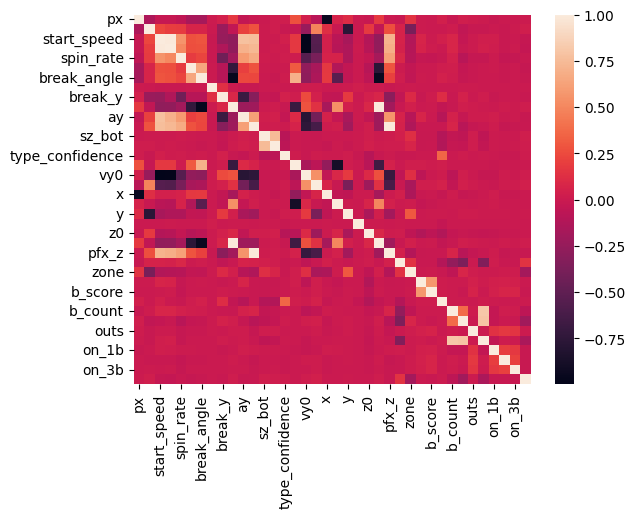

In [69]:
# create a correlation map (dropping pitch type, type, and code because they are not numeric)
corr_map = pitches_strat.drop(columns=['pitch_type','type','code']).corr()

sns.heatmap(corr_map)

From the heatmap, it is evident that some variables are highly correlated.  
The features can be reduced by removing these features.

In [70]:
# create a function to show columns that are highly correlated
def show_high_correlation(corr_map):
    # set a low threshold of 90% for high correlation, and a high of 0.99 (don't want to get rid of all of the columns because they correlate to themselves)
    threshold_low = 0.90
    threshold_high= 0.99

    # create and apply the mask
    high_corr_mask = (corr_map.abs() >= threshold_low) & (corr_map.abs() < threshold_high)
    high_corr = corr_map[high_corr_mask]

    # output the feature pairs that meet the threshold
    pairs = []
    for i in range(high_corr_mask.shape[0]):
        for j in range(i+1, high_corr_mask.shape[1]):
            if high_corr_mask.iloc[i, j]:
                pairs.append([high_corr_mask.columns[i], high_corr_mask.columns[j], corr_map.iloc[i, j]])
    print(pd.DataFrame(data = pairs, columns=['col1','col2','correlation']))

show_high_correlation(corr_map)

          col1       col2  correlation
0           px          x    -0.938545
1  start_speed  end_speed     0.987805
2    end_speed        vy0    -0.989392
3  break_angle         ax    -0.965571
4  break_angle      pfx_x    -0.944748
5           az      pfx_z     0.987531


Start speed and end speed are highly correlated.  
End speed and velocity y at 0 are also highly correlated.  
We should be able to remove start speed and vy0.  
But I'd like to create a new column representing the change in speed during the pitch.  
px is the x position of the ball as it crosses home plate so we'll keep this and remove x

A custom tranformer is created to create the speed_delta column, and remove the start_speed column once it is complete.  
The other columns will be removed during the call of the pipeline.

In [71]:
# create a transformer to create the speed_delta column
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

class SpeedTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X):
        X = X.copy()  # create a copy of the input DataFrame to avoid changing the original data
        X.loc[:, 'speed_delta'] = X.loc[:, 'start_speed'] - X.loc[:, 'end_speed']

        X.drop(columns='start_speed',axis=1,inplace=True)

        return X

# test the transformer
transformer_test = SpeedTransformer().fit_transform(pitches_strat)
transformer_test.head()

,px,pz,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,strike,speed_delta
1225416,-0.259000,3.873000,87.9,2194.092,237.497,36.5,5.4,23.8,-17.825000,30.820000,-20.817000,1.610000,3.600000,0.696,9.873000,-139.753000,-1.884000,126.87,-2.665000,134.21,50.0,5.920000,-8.990000,5.690000,47.0,11.0,S,S,FF,165,2.0,2.016135e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1,7.6
2677086,-0.554044,3.292204,71.8,352.048,46.908,-3.9,10.4,23.9,2.013034,19.556727,-34.057203,1.896283,3.665081,0.898,2.073759,-113.598273,1.643076,138.12,-1.675289,149.89,50.0,5.929063,1.530678,-1.431920,68.0,1.0,C,S,SL,370,4.0,2.018137e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,6.3
2244880,-0.614322,2.060713,78.8,2300.070,247.132,34.2,7.9,23.8,-18.237271,24.980783,-24.482407,1.362130,3.048041,2.000,5.332695,-124.844799,-4.321223,140.42,-1.277125,183.16,50.0,5.827355,-11.547751,4.870310,34.0,4.0,X,X,CH,445,4.0,2.018026e+09,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0,7.1
2538363,0.897425,0.905532,81.0,581.090,140.543,-7.9,7.3,23.9,3.215076,22.475472,-28.267997,1.319131,3.138364,2.000,5.433432,-126.306039,-5.976366,82.79,-1.525079,214.33,50.0,5.536762,1.963747,2.385790,55.0,14.0,S,S,SL,249,2.0,2.018101e+09,2.0,2.0,1.0,6.0,1.0,0.0,0.0,1,5.8
2743818,-0.361299,1.888494,75.4,796.985,181.431,-1.6,7.4,23.8,-0.163285,22.536579,-25.643916,1.590000,3.470000,0.876,5.006386,-118.906725,-2.465406,130.77,-2.478029,187.79,50.0,5.262450,-0.113910,4.555485,63.0,7.0,X,X,SL,197,0.0,2.018154e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,6.3


The strikezone data looks fairly distributed, but has extreme outliers.  
These outliers can be removed from the dataset.

<Axes: xlabel='sz_bot', ylabel='Count'>

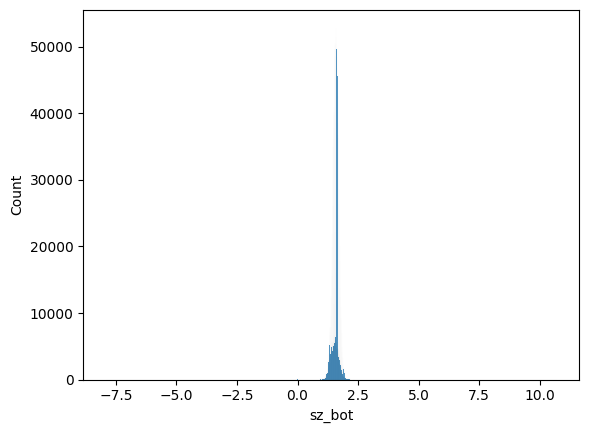

In [72]:
# sz_bot is the bottom of the strike zone
# there appears to be some outliers distorting our data set
pitches_strat['sz_bot'].describe()
sns.histplot(pitches_strat['sz_bot'])

Modified Z-Score is the method to remove the outliers.  
When attempting IQR*1.5, it was removing too much of the viable data.

<Axes: xlabel='sz_bot', ylabel='Count'>

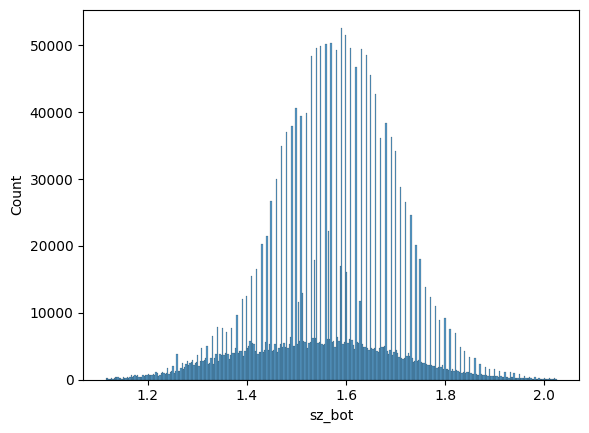

In [73]:
# find the median and absolute deviation
sz_bot_med = pitches_strat['sz_bot'].median()
sz_bot_abs_dev = np.abs(pitches_strat['sz_bot']-sz_bot_med)

# find the MAD (median absolute deviation)
sz_bot_MAD = sz_bot_abs_dev.median()

# create a new column with the sz_bot modified z-score and reduce the features
pitches_strat['sz_bot_modified_z_score'] = 0.6745 * sz_bot_abs_dev/ sz_bot_MAD
pitches_strat_reduced = pitches_strat[pitches_strat['sz_bot_modified_z_score'] <= 3.5].reset_index(drop=True)


sns.histplot(pitches_strat_reduced['sz_bot'])

After the data is prepared, the temporary column can be removed.

In [74]:
# this looks much better, so we can remove the modified-z score column
pitches_strat_reduced = pitches_strat_reduced.drop(columns=['sz_bot_modified_z_score'])

The same process can be done for the top of the strike zone.

<Axes: xlabel='sz_top', ylabel='Count'>

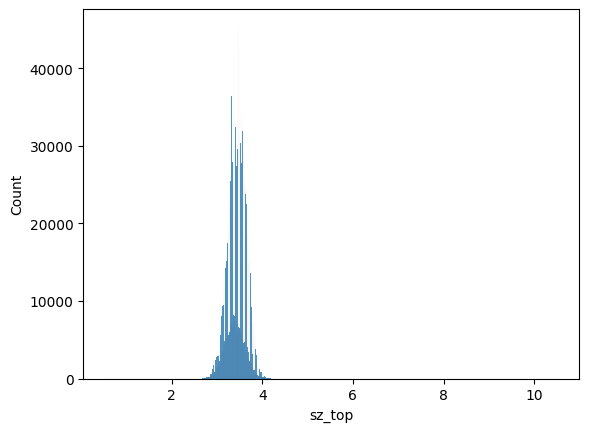

In [75]:
# we can do the same for the top of the strike zone
sns.histplot(pitches_strat_reduced['sz_top'])

Using modified Z-Score method for consistency and to keep the most valuable data.

<Axes: xlabel='sz_top', ylabel='Count'>

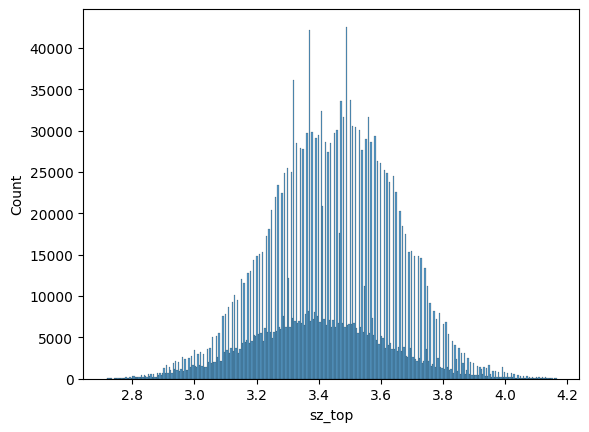

In [76]:
# find the median and absolute deviation
sz_top_med = pitches_strat_reduced['sz_top'].median()
sz_top_abs_dev = np.abs(pitches_strat_reduced['sz_top']-sz_top_med)

# find the MAD (median absolute deviation)
sz_top_MAD = sz_top_abs_dev.median()

# create a new column with the sz_top modified z-score and reduce the features
pitches_strat_reduced['sz_top_modified_z_score'] = 0.6745 * sz_top_abs_dev/ sz_top_MAD
pitches_strat_reduced = pitches_strat_reduced[pitches_strat_reduced['sz_top_modified_z_score'] <= 3.5].reset_index(drop=True)


sns.histplot(pitches_strat_reduced['sz_top'])

The distribution looks much cleaner.  
The temporary column can be removed.

In [77]:
# this looks much better, so we can remove the modified z-score column
pitches_strat_reduced = pitches_strat_reduced.drop(columns=['sz_top_modified_z_score'])

In [78]:
pitches_strat_reduced.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,strike
0,-0.259000,3.873000,95.5,87.9,2194.092,237.497,36.5,5.4,23.8,-17.825000,30.820000,-20.817000,1.610000,3.600000,0.696,9.873000,-139.753000,-1.884000,126.87,-2.665000,134.21,50.0,5.920000,-8.990000,5.690000,47.0,11.0,S,S,FF,165,2.0,2.016135e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0,1
1,-0.554044,3.292204,78.1,71.8,352.048,46.908,-3.9,10.4,23.9,2.013034,19.556727,-34.057203,1.896283,3.665081,0.898,2.073759,-113.598273,1.643076,138.12,-1.675289,149.89,50.0,5.929063,1.530678,-1.431920,68.0,1.0,C,S,SL,370,4.0,2.018137e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,-0.614322,2.060713,85.9,78.8,2300.070,247.132,34.2,7.9,23.8,-18.237271,24.980783,-24.482407,1.362130,3.048041,2.000,5.332695,-124.844799,-4.321223,140.42,-1.277125,183.16,50.0,5.827355,-11.547751,4.870310,34.0,4.0,X,X,CH,445,4.0,2.018026e+09,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0
3,0.897425,0.905532,86.8,81.0,581.090,140.543,-7.9,7.3,23.9,3.215076,22.475472,-28.267997,1.319131,3.138364,2.000,5.433432,-126.306039,-5.976366,82.79,-1.525079,214.33,50.0,5.536762,1.963747,2.385790,55.0,14.0,S,S,SL,249,2.0,2.018101e+09,2.0,2.0,1.0,6.0,1.0,0.0,0.0,1
4,-0.361299,1.888494,81.7,75.4,796.985,181.431,-1.6,7.4,23.8,-0.163285,22.536579,-25.643916,1.590000,3.470000,0.876,5.006386,-118.906725,-2.465406,130.77,-2.478029,187.79,50.0,5.262450,-0.113910,4.555485,63.0,7.0,X,X,SL,197,0.0,2.018154e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


Prepare the numeric pipeline.
* Call the custom transformer
* Impute median into null values
* Scale the data

In [79]:
# now we can create pipelines to normalize the numeric data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# get the numeric columns (exclude ab_id because it is an identifier)
numeric_cols = pitches_strat_reduced.drop(columns=['strike','pitch_type','code','type','ab_id'],axis=1).columns
# create the numeric pipeline
num_pipeline = Pipeline([
    ('initial',SpeedTransformer()),
    ('impute',SimpleImputer(fill_value='median')),
    ('scaler',StandardScaler())
])

# test the pipeline against the numeric columns
num_pipeline_test = num_pipeline.fit_transform(pitches_strat_reduced[numeric_cols])

# the process removes start_speed and adds speed_delta so we need to update the columns to reflect this
transformed_num_cols = [col for col in numeric_cols if col != 'start_speed']
transformed_num_cols.append('speed_delta')

# convert it back to a dataframe and look at the top records
pd.DataFrame(num_pipeline_test,columns=transformed_num_cols).head()

,px,pz,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,event_num,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,speed_delta
0,-0.297637,1.710070,1.218983,0.678256,0.849295,1.254479,-0.008186,-0.260860,-1.444898,1.045227,0.221868,0.314405,0.797544,-1.544044,1.267212,-1.249020,0.826663,0.314239,-1.125884,-1.482162,0.000000e+00,0.231014,-1.250950,0.124200,0.152414,0.290845,-0.766542,-0.099863,-0.911907,1.353199,-1.200374,0.060511,-0.658227,-0.475396,-0.323729,0.528785
1,-0.628133,1.096339,-1.782038,-2.019239,-1.977153,-0.399011,0.025297,1.287139,0.402539,-1.673426,-1.271644,2.451270,1.114009,-1.179207,-0.034978,1.747887,1.975961,0.648172,-0.553297,-0.930134,0.000000e+00,0.250806,0.425725,-1.248751,1.399809,-2.171017,0.297231,0.684117,-0.911907,-1.070698,-1.200374,-1.096916,-0.658227,-0.475396,-0.323729,-0.652268
2,-0.695655,-0.204987,-0.477247,0.833450,0.992183,1.160344,0.008556,-0.260860,-1.483291,-0.364204,-0.191594,-1.535736,-1.886435,0.811141,0.509146,0.459218,0.032493,0.716443,-0.322943,0.241166,0.000000e+00,0.028689,-1.658577,-0.033818,-0.619783,-1.432458,0.686417,0.684117,0.123796,-1.070698,0.022937,-0.518203,-0.658227,-0.475396,-0.323729,0.074534
3,0.997745,-1.425676,-0.067169,-1.683829,-0.588539,-0.562723,0.004538,1.287139,0.514480,-0.968919,-0.618614,-1.856692,-1.447224,0.811141,0.525965,0.291784,-0.506836,-0.994186,-0.466394,1.338533,0.000000e+00,-0.605923,0.494743,-0.512780,0.627612,1.029403,-0.330654,-0.099863,1.159499,1.353199,0.022937,1.796653,1.519233,-0.475396,-0.323729,-1.106519
4,-0.412228,-0.386972,-1.111002,-1.367672,0.017832,-0.304877,0.005207,-0.260860,0.199867,-0.954170,-0.322614,0.165121,0.165401,-1.218942,0.454664,1.139625,0.637211,0.430002,-1.017714,0.404169,5.684342e-14,-1.204981,0.163628,-0.094510,1.102810,-0.693900,-0.600490,-0.883843,-0.911907,-1.070698,-1.200374,-1.096916,-0.658227,-0.475396,-0.323729,-0.652268


Prepare the categorical pipeline.  
This will perform OneHotEncoder on the pitch_type column.

In [80]:
# create the categorization pipeline
from sklearn.preprocessing import OneHotEncoder

# get the categorical columns
cat_cols = ['pitch_type']

# create the pipeline
cat_pipeline = Pipeline([
    ('onehot',OneHotEncoder(drop='first'))
])

# test the cat pipeline
cat_pipeline_test = cat_pipeline.fit_transform(pitches_strat_reduced[cat_cols])

# view the output
# Get the OneHotEncoder object from the pipeline
test_categories = cat_pipeline.named_steps['onehot'].categories_[0][1:]
transformed_cat_cols = [f'{cat_cols[0]}_{category}' for category in test_categories]
cat_pipeline_df = pd.DataFrame(cat_pipeline_test.toarray(), columns=transformed_cat_cols)
cat_pipeline_df.head()

,pitch_type_CH,pitch_type_CU,pitch_type_EP,pitch_type_FA,pitch_type_FC,pitch_type_FF,pitch_type_FO,pitch_type_FS,pitch_type_FT,pitch_type_IN,pitch_type_KC,pitch_type_KN,pitch_type_PO,pitch_type_SC,pitch_type_SI,pitch_type_SL,pitch_type_UN
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Create a column transformer to combine the pipelines and transform the data.

In [81]:
# combine the pipelines

reduced = SpeedTransformer().fit_transform(pitches_strat_reduced)
total_pipeline = ColumnTransformer(transformers=[
    ('numeric',num_pipeline,numeric_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
])

# test the output
transformed_test = total_pipeline.fit_transform(pitches_strat_reduced)
pd.DataFrame(transformed_test,columns=(transformed_num_cols+transformed_cat_cols)).head()

,px,pz,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,ay,az,sz_bot,sz_top,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,pfx_x,pfx_z,nasty,zone,event_num,b_score,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,speed_delta,pitch_type_CH,pitch_type_CU,pitch_type_EP,pitch_type_FA,pitch_type_FC,pitch_type_FF,pitch_type_FO,pitch_type_FS,pitch_type_FT,pitch_type_IN,pitch_type_KC,pitch_type_KN,pitch_type_PO,pitch_type_SC,pitch_type_SI,pitch_type_SL,pitch_type_UN
0,-0.297637,1.710070,1.218983,0.678256,0.849295,1.254479,-0.008186,-0.260860,-1.444898,1.045227,0.221868,0.314405,0.797544,-1.544044,1.267212,-1.249020,0.826663,0.314239,-1.125884,-1.482162,0.000000e+00,0.231014,-1.250950,0.124200,0.152414,0.290845,-0.766542,-0.099863,-0.911907,1.353199,-1.200374,0.060511,-0.658227,-0.475396,-0.323729,0.528785,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.628133,1.096339,-1.782038,-2.019239,-1.977153,-0.399011,0.025297,1.287139,0.402539,-1.673426,-1.271644,2.451270,1.114009,-1.179207,-0.034978,1.747887,1.975961,0.648172,-0.553297,-0.930134,0.000000e+00,0.250806,0.425725,-1.248751,1.399809,-2.171017,0.297231,0.684117,-0.911907,-1.070698,-1.200374,-1.096916,-0.658227,-0.475396,-0.323729,-0.652268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.695655,-0.204987,-0.477247,0.833450,0.992183,1.160344,0.008556,-0.260860,-1.483291,-0.364204,-0.191594,-1.535736,-1.886435,0.811141,0.509146,0.459218,0.032493,0.716443,-0.322943,0.241166,0.000000e+00,0.028689,-1.658577,-0.033818,-0.619783,-1.432458,0.686417,0.684117,0.123796,-1.070698,0.022937,-0.518203,-0.658227,-0.475396,-0.323729,0.074534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.997745,-1.425676,-0.067169,-1.683829,-0.588539,-0.562723,0.004538,1.287139,0.514480,-0.968919,-0.618614,-1.856692,-1.447224,0.811141,0.525965,0.291784,-0.506836,-0.994186,-0.466394,1.338533,0.000000e+00,-0.605923,0.494743,-0.512780,0.627612,1.029403,-0.330654,-0.099863,1.159499,1.353199,0.022937,1.796653,1.519233,-0.475396,-0.323729,-1.106519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.412228,-0.386972,-1.111002,-1.367672,0.017832,-0.304877,0.005207,-0.260860,0.199867,-0.954170,-0.322614,0.165121,0.165401,-1.218942,0.454664,1.139625,0.637211,0.430002,-1.017714,0.404169,5.684342e-14,-1.204981,0.163628,-0.094510,1.102810,-0.693900,-0.600490,-0.883843,-0.911907,-1.070698,-1.200374,-1.096916,-0.658227,-0.475396,-0.323729,-0.652268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The first model attempt will be a LinearRegression model.  
Performing a classification report to view the output.

In [82]:
# import the required packages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

# going to take a random sampling of 200,000 records to help improve model training computational efficiency
pitches_strat_sample = pitches_strat_reduced.sample(n=200000, random_state=42)


# separate the features and target
features = pitches_strat_sample
target = pitches_strat_sample['strike']

# split out the data for test and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# create the linear regression pipeline
linreg_pipeline = Pipeline([
    ('total_pipeline', total_pipeline),
    ('linreg',LinearRegression())
])

# fit and predict the model
linreg_pipeline.fit(X_train,y_train)
linreg_predictions = np.where(linreg_pipeline.predict(X_train) > 0.5, 1, 0)

# print the classification report
print(classification_report(y_train, linreg_predictions))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86    117691
           1       0.69      0.14      0.24     42309

    accuracy                           0.76    160000
   macro avg       0.73      0.56      0.55    160000
weighted avg       0.74      0.76      0.69    160000



There are many more non-strikes than strikes.  
This model does not seem to perform well, given the recall for predicting strikes is only .14 and the f1-score is 0.23.  
  
Next attempt is with a RandomForest Classifier model.  
This will perform a cross_validation for the scores.

In [83]:
# import the required packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# create the pipeline
rf_pipeline = Pipeline([
    ('total_pipeline', total_pipeline),
    ('random_forest', RandomForestClassifier(random_state=42))
])

# perform the cross validation
rf_predictions = cross_val_predict(rf_pipeline,X_train,y_train,cv=StratifiedKFold(n_splits=5))

print(classification_report(y_train,rf_predictions))

# takes about 6 minutes to run

              precision    recall  f1-score   support

           0       0.80      0.93      0.86    117691
           1       0.65      0.35      0.45     42309

    accuracy                           0.78    160000
   macro avg       0.73      0.64      0.66    160000
weighted avg       0.76      0.78      0.75    160000



There is definitely improvement with this model, but it is till poorly classifying the 1 category, which represents strikes.  
Next model to try will be an SVM model for categorical data called SVC.

In [84]:
# import the required package
from sklearn.svm import SVC

# create the pipeline
svc_pipeline = Pipeline([
    ('total_pipeline',total_pipeline),
    ('svc',SVC(class_weight='balanced',random_state=42))
])

# fit and predict the values
svc_pipeline.fit(X_train,y_train)
svc_predictions = svc_pipeline.predict(X_train)

# view the classification report
print(classification_report(y_train, svc_predictions))

# note, this can take about 90 minutes to run 

              precision    recall  f1-score   support

           0       0.91      0.71      0.80    117691
           1       0.50      0.80      0.61     42309

    accuracy                           0.73    160000
   macro avg       0.70      0.75      0.70    160000
weighted avg       0.80      0.73      0.75    160000



With this model, the precision for strikes is about 50%, and the recall is about 80%.  
The harmonic mean (f1-score) of this is about 61%.  
There is room for improvement with this model, but we can see with some additional analysis, this model could be improved and applied to improve pitching calls to raise strike averages.